##Total preprocessing

#Basic Modules need for preprocessing

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Loading the DataSet.

In [47]:
df = pd.read_csv('/content/all-data.csv', delimiter=',', encoding='latin-1', header=None)

df.columns = ['Sentiment', 'Message']

#DataSet

In [48]:
display(df)


,Sentiment,Message
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


#Lowercasting Sentences and Tokenizing Them.

In [50]:
df['Message']=[i.lower() for i in df['Message']]
import spacy

nlp = spacy.load("en_core_web_sm")
li=[]
for i in df['Message']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  li.append(tokens)
df['token']=li

#Lemmatizing the Words.

In [51]:
import spacy

nlp = spacy.load("en_core_web_sm")
lematiz=[]
for doc in df['token']:
  doc_text = " ".join(doc)
  spacy_doc = nlp(doc_text)

  lemmas = [token.lemma_ for token in spacy_doc]
  lematiz.append(lemmas)
df['lematization']=lematiz

#Removing stopwords

In [52]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stop=[]
for words in df['lematization']:
  filtered = [word for word in words if word.lower() not in stop_words]
  stop.append(filtered)
df['stopwords']=stop


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Dataset after every step .

In [53]:
df

,Sentiment,Message,token,lematization,stopwords
0,neutral,"according to gran , the company has no plans t...","[according, to, gran, ,, the, company, has, no...","[accord, to, gran, ,, the, company, have, no, ...","[accord, gran, ,, company, plan, move, product..."
1,neutral,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plan, to, develop, in, stage, an...","[technopolis, plan, develop, stage, area, less..."
2,negative,the international electronic industry company ...,"[the, international, electronic, industry, com...","[the, international, electronic, industry, com...","[international, electronic, industry, company,..."
3,positive,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre..."
4,positive,according to the company 's updated strategy f...,"[according, to, the, company, 's, updated, str...","[accord, to, the, company, 's, update, strateg...","[accord, company, 's, update, strategy, year, ..."
...,...,...,...,...,...
4841,negative,london marketwatch -- share prices ended lower...,"[london, marketwatch, --, share, prices, ended...","[london, marketwatch, --, share, price, end, l...","[london, marketwatch, --, share, price, end, l..."
4842,neutral,rinkuskiai 's beer sales fell by 6.5 per cent ...,"[rinkuskiai, 's, beer, sales, fell, by, 6.5, p...","[rinkuskiai, 's, beer, sale, fall, by, 6.5, pe...","[rinkuskiai, 's, beer, sale, fall, 6.5, per, c..."
4843,negative,operating profit fell to eur 35.4 mn from eur ...,"[operating, profit, fell, to, eur, 35.4, mn, f...","[operating, profit, fall, to, eur, 35.4, mn, f...","[operating, profit, fall, eur, 35.4, mn, eur, ..."
4844,negative,net sales of the paper segment decreased to eu...,"[net, sales, of, the, paper, segment, decrease...","[net, sale, of, the, paper, segment, decrease,...","[net, sale, paper, segment, decrease, eur, 221..."


In [54]:
import re
def remove_html_tokens(token_list):
    return [token for token in token_list if not re.match(r'^<\/?\w+>$', token)]

df["token"] = df["token"].apply(remove_html_tokens)

##EDA - Exploratory Data Analysys

In [55]:
df1=df.copy()

#Bar Plot for sentiment

,count
Sentiment,
neutral,2879
positive,1363
negative,604


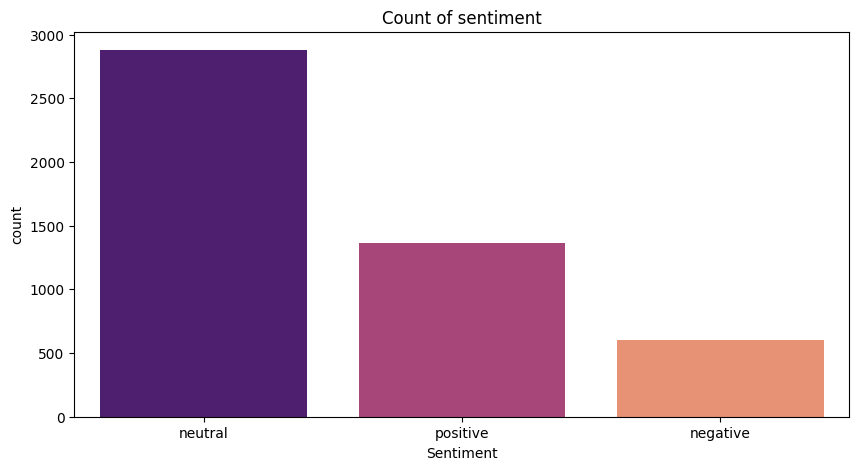

In [56]:
#Barplot:
plt.figure(figsize=(10, 5))

x = df1["Sentiment"].value_counts()
display(x)
sns.barplot(x, palette="magma")

plt.title("Count of sentiment")
plt.show()

*OBSEVATION* : The Barplot shows the count of the each value in the Sentiment column and the Higest value_count is all about "neutral" and the second higest is  "Positive"



#Word cloud for stop Words

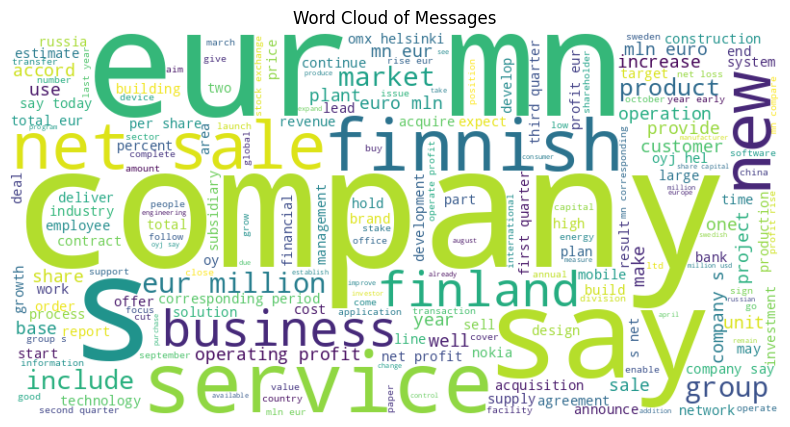

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text=''
for i in df1['stopwords']:
  temp=" ".join(i)
  text=text+' '+temp

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Messages")
plt.show()

OBSEVATION : It shows the most repeated words in the all columns

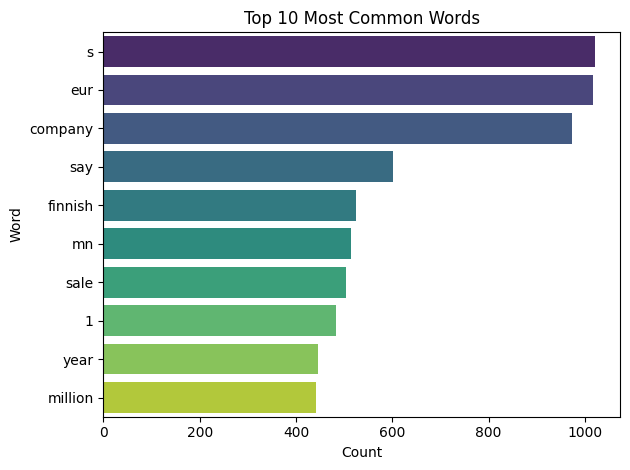

In [59]:
from collections import Counter
import re

words = re.findall(r'\b\w+\b', text.lower())
common_words = Counter(words).most_common(10)
words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

sns.barplot(x='Count', y='Word', data=words_df,  palette="viridis")
plt.title("Top 10 Most Common Words")
plt.tight_layout()
plt.show()


OBSERVATION : Its shows the top-10 of most common words with count of it

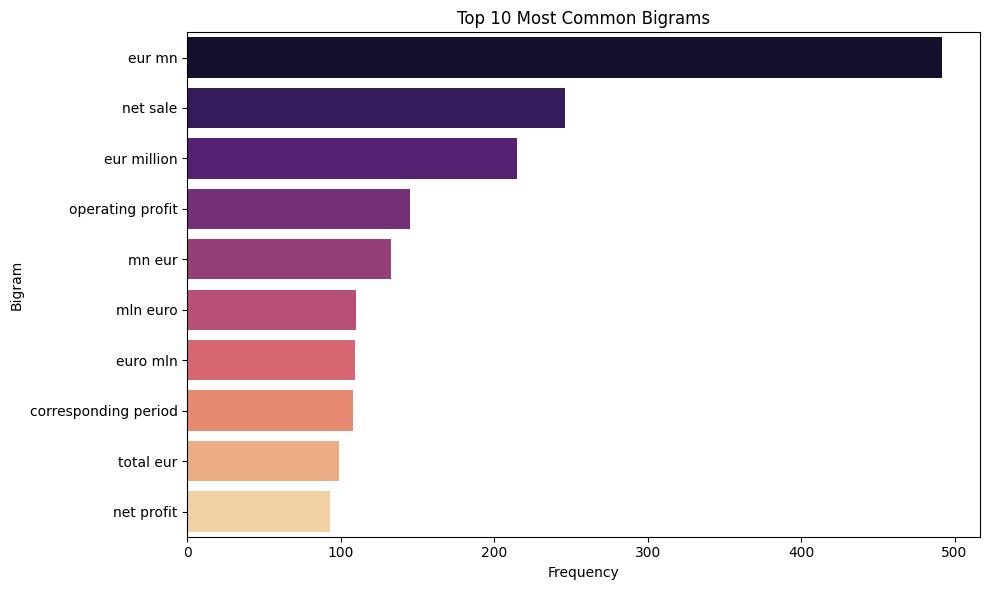

In [60]:
from collections import Counter
from nltk.util import bigrams


# Step 1: Flatten all bigrams from the tokenized column
all_bigrams = []

for tokens in df1["stopwords"]:
    # Only use alphabetic tokens (optional cleanup)
    tokens = [t.lower() for t in tokens if t.isalpha()]
    bigrams_in_row = list(bigrams(tokens))  # create bigrams
    all_bigrams.extend(bigrams_in_row)

# Step 2: Count bigram frequency
bigram_counts = Counter(all_bigrams)

# Step 3: Get top N bigrams
top_n = 10
most_common_bigrams = bigram_counts.most_common(top_n)

# Step 4: Prepare for plotting
bigram_df = pd.DataFrame(most_common_bigrams, columns=["bigram", "count"])
bigram_df["bigram"] = bigram_df["bigram"].apply(lambda x: " ".join(x))

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="bigram", data=bigram_df, palette="magma")
plt.title("Top 10 Most Common Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()

Observation : Top 10 most Reapted words in pairs of 2

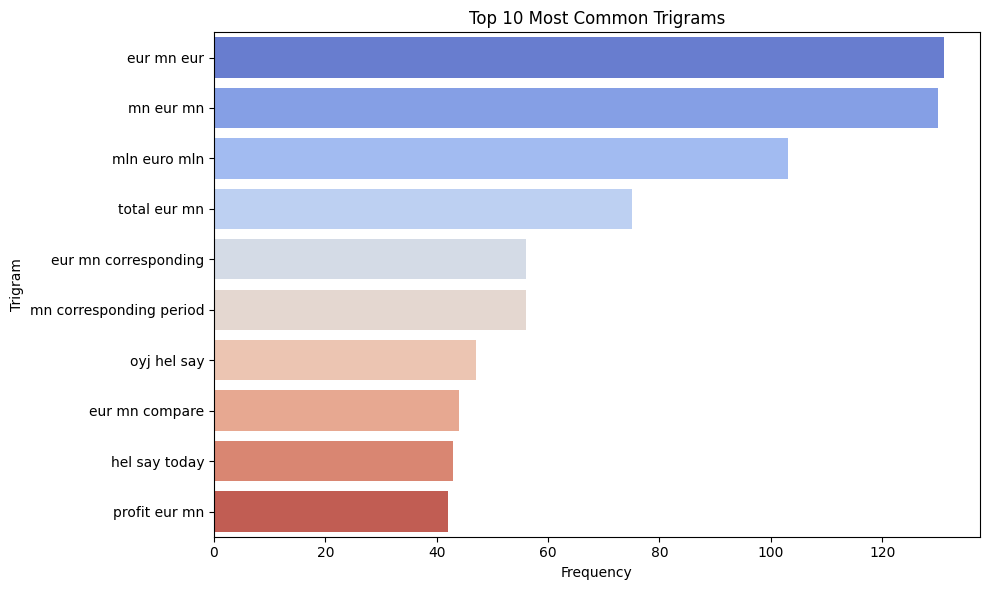

In [61]:
import pandas as pd
from collections import Counter
from nltk.util import trigrams
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Flatten all trigrams from the tokenized column
all_trigrams = []

for tokens in df1["stopwords"]:
    # Optional: clean tokens, keep only alphabetic and lowercase
    tokens = [t.lower() for t in tokens if t.isalpha()]
    trigrams_in_row = list(trigrams(tokens))  # create trigrams
    all_trigrams.extend(trigrams_in_row)

# Step 2: Count trigram frequency
trigram_counts = Counter(all_trigrams)

# Step 3: Get top N trigrams
top_n = 10
most_common_trigrams = trigram_counts.most_common(top_n)

# Step 4: Prepare for plotting
trigram_df = pd.DataFrame(most_common_trigrams, columns=["trigram", "count"])
trigram_df["trigram"] = trigram_df["trigram"].apply(lambda x: " ".join(x))

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="trigram", data=trigram_df, palette="coolwarm")
plt.title("Top 10 Most Common Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.tight_layout()
plt.show()


Observation : Top 10 most Reapted words in pairs of 3

##All the packages to train the model

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import requests
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, Bidirectional, LSTM, Dense,
                                   Dropout, SpatialDropout1D, BatchNormalization)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tensorflow as tf


In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

##Reading csv file and creating a DataFrame

In [3]:

df_main = pd.read_csv('/content/all-data.csv', delimiter=',', encoding='latin-1', header=None)


df_main.columns = ['Sentiment', 'Message']



##Data Frame

In [4]:
df_main

,Sentiment,Message
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


##Encoading the Sentiment

In [5]:
index = {"negative": 0, "positive": 2, "neutral": 1}
df_main['Sentiment'] = df_main['Sentiment'].map(index)


##Process to clean the Data

In [6]:
def cleanText(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+', '[URL]', text)
    text = re.sub(r'@\w+', '[USER]', text)
    text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.lower().strip()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def tokenize_text(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(tokens)


##Cleaning the data

In [7]:
df_main['Message'] = df_main['Message'].apply(cleanText).apply(tokenize_text)


##Splitting the Data

In [8]:
train, test = train_test_split(df_main, test_size=0.2, random_state=42)


##Tokenizing and padding the data

In [9]:
MAX_SEQUENCE_LENGTH = 150
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_main['Message'])

vocab_size = len(tokenizer.word_index) + 1

X_train = pad_sequences(tokenizer.texts_to_sequences(train['Message']), maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(tokenizer.texts_to_sequences(test['Message']), maxlen=MAX_SEQUENCE_LENGTH)
y_train = to_categorical(train['Sentiment'], num_classes=3)
y_test = to_categorical(test['Sentiment'], num_classes=3)


##Downloading Glove resourses

In [10]:
embedding_dim = 200
embeddings_index = {}
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"

print("Downloading GloVe embeddings...")
response = requests.get(glove_url)
with zipfile.ZipFile(BytesIO(response.content)) as z:
    with z.open("glove.6B.200d.txt") as f:
        for line in f:
            values = line.decode('utf-8').split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
print(f"Loaded {len(embeddings_index)} word vectors")


Loaded 400000 word vectors


##Encoading the model usding Glove

In [11]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
        else:
            embedding_matrix[i] = np.random.normal(size=(embedding_dim,))


##Balancing the class weights for making model unbaised.

In [12]:
class_weights = compute_class_weight('balanced', classes=np.unique(train['Sentiment']), y=train['Sentiment'])
class_weights = dict(enumerate(class_weights))


##Building the model

In [13]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
              input_length=MAX_SEQUENCE_LENGTH, trainable=True),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
    BatchNormalization(),
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.compile(
    optimizer=Adam(learning_rate=0.001, clipnorm=1.0),
    loss=CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)


##Call backs to stop the training from overfitting

In [15]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]


##Training the model

In [16]:
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test),
    class_weight=class_weights,
    callbacks=callbacks
)


Epoch 1/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - accuracy: 0.3640 - loss: 1.2817 - precision: 0.3605 - recall: 0.2175 - val_accuracy: 0.3835 - val_loss: 1.0939 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.4094 - loss: 1.1272 - precision: 0.4374 - recall: 0.1906 - val_accuracy: 0.5856 - val_loss: 1.0532 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.4497 - loss: 1.0897 - precision: 0.5143 - recall: 0.2021 - val_accuracy: 0.5969 - val_loss: 1.0298 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.5207 - loss: 0.9852 - precision: 0.6291 - recall: 0.2810 - val_accuracy: 0.5928 - val_loss: 0.9660 - val_precision: 0.8000 - val_recall: 0.0784 - learning_rate: 0.0010
Epoch 5/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 167s 3

Classification Report.

In [17]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=index.keys()))


31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 475ms/step

Classification Report:
              precision    recall  f1-score   support

    negative       0.58      0.79      0.67       110
    positive       0.85      0.80      0.82       571
     neutral       0.70      0.70      0.70       289

    accuracy                           0.77       970
   macro avg       0.71      0.76      0.73       970
weighted avg       0.78      0.77      0.77       970



##Confusion matrix and accuracy plots

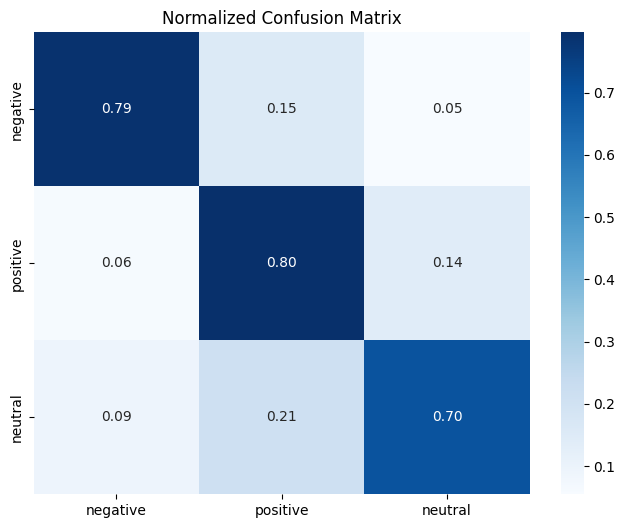

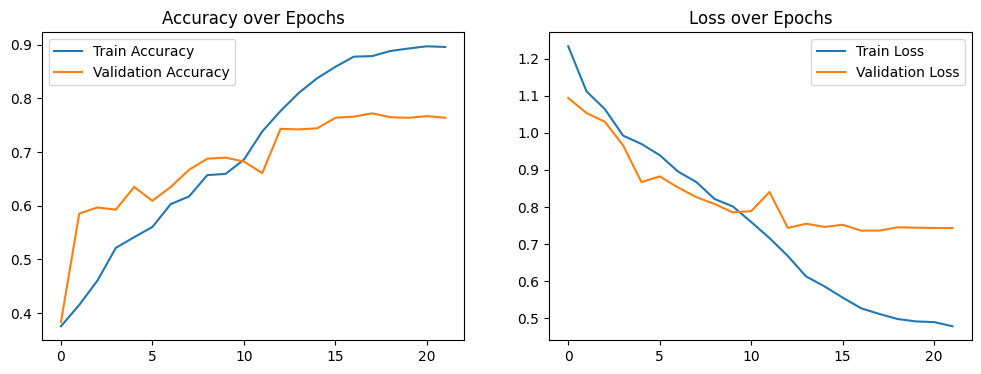

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes, normalize='true'),
            annot=True, fmt='.2f', cmap='Blues',
            xticklabels=index.keys(), yticklabels=index.keys())
plt.title('Normalized Confusion Matrix')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


##Saveing the models

In [30]:
# Save the trained model as a .h5 or keras file
model.save("sentiment_model.keras")


In [31]:
import pickle

# Save the tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


##Testing using saved models and same vecotization.

In [32]:
import numpy as np
import pickle
import re
import nltk
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


model = load_model('sentiment_model.keras')
with open('tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)


MAX_SEQUENCE_LENGTH = 150


index = {"negative": 0, "positive": 2, "neutral": 1}
reverse_index = {v: k for k, v in index.items()}


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+', '[URL]', text)
    text = re.sub(r'@\w+', '[USER]', text)
    text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.lower().strip()

def tokenize_text(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(tokens)

def manual_testing_interface():
    print("\n" + "="*50)
    print("SENTIMENT ANALYSIS MANUAL TESTING INTERFACE")
    print("="*50)
    print("\nEnter your text to analyze its sentiment (type 'quit' to exit)\n")

    while True:
        text = input("Enter text: ").strip()
        if text.lower() in ['quit', 'exit', 'q']:
            print("\nExiting testing interface...\n")
            break

        if not text:
            print("Please enter some text to analyze.")
            continue

        try:
            cleaned = clean_text(text)
            tokenized = tokenize_text(cleaned)
            sequence = tokenizer.texts_to_sequences([tokenized])
            padded = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)

            prediction = model.predict(padded)
            pred_class = np.argmax(prediction)
            confidence = np.max(prediction)
            probs = {reverse_index[i]: float(prediction[0][i]) for i in range(len(reverse_index))}

            print("\n" + "-"*50)
            print(f"Original Text: {text}")
            print(f"Cleaned Text: {cleaned}")
            print(f"Tokenized Text: {tokenized}")
            print("\nSentiment Analysis Results:")
            print(f"Predicted Sentiment: {reverse_index[pred_class]} (confidence: {confidence:.2%})")
            print("\nProbabilities:")
            for sentiment, prob in sorted(probs.items(), key=lambda x: x[1], reverse=True):
                print(f"  {sentiment.upper():<8}: {prob:.2%}")
            print("-"*50 + "\n")

        except Exception as e:
            print(f"\nError processing text: {str(e)}\n")


manual_testing_interface()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 25 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



SENTIMENT ANALYSIS MANUAL TESTING INTERFACE

Enter your text to analyze its sentiment (type 'quit' to exit)

Enter text: sensex falls by 2%.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

--------------------------------------------------
Original Text: sensex falls by 2%.
Cleaned Text: sensex falls by 2
Tokenized Text: sensex fall

Sentiment Analysis Results:
Predicted Sentiment: negative (confidence: 69.24%)

Probabilities:
  NEGATIVE: 69.24%
  NEUTRAL : 22.69%
  POSITIVE: 8.07%
--------------------------------------------------

Enter text: quit

Exiting testing interface...



In [22]:
!pip install pyngrok

In [23]:

!ngrok authtoken  "YOUR AUTHENTICATION ID"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


##All the required pakages for deployment.

In [36]:
import re
import numpy as np
import pickle
import threading
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from flask import Flask, request, render_template_string
from pyngrok import ngrok
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import socket
from contextlib import closing

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


##Loading the trained models and tokenizer.

In [37]:
try:
    print("Loading pre-trained model and tokenizer...")
    model = load_model('sentiment_model.keras')  # Or .h5 if applicable
    with open('tokenizer_15.pickle', 'rb') as f:
        tokenizer = pickle.load(f)
    print("Model and tokenizer loaded successfully!")
except Exception as e:
    print(f"Error loading model/tokenizer: {e}")


Loading pre-trained model and tokenizer...
Error loading model/tokenizer: [Errno 2] No such file or directory: 'tokenizer_15.pickle'


##Encoading same as we encoded the dataset .

In [38]:
MAX_SEQUENCE_LENGTH = 150
sentiment_labels = {0: 'negative', 1: 'neutral', 2: 'positive'}

def cleanText(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+', '[URL]', text)
    text = re.sub(r'@\w+', '[USER]', text)
    text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.lower().strip()

def tokenize_text(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in words
              if word.lower() not in stop_words]
    return ' '.join(tokens)

def predict_sentiment(text):
    try:
        cleaned = cleanText(text)
        tokenized = tokenize_text(cleaned)
        sequence = tokenizer.texts_to_sequences([tokenized])
        padded = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
        prediction = model.predict(padded, verbose=0)
        predicted_class = int(np.argmax(prediction))
        confidence = float(np.max(prediction))
        probabilities = {
            'positive': float(prediction[0][2]),
            'neutral': float(prediction[0][1]),
            'negative': float(prediction[0][0])
        }
        return sentiment_labels[predicted_class], confidence, probabilities
    except Exception as e:
        print(f"Prediction error: {e}")
        return "error", 0.0, {'positive': 0, 'neutral': 0, 'negative': 0}


##HTML template and defing the flask.

In [39]:
HTML_TEMPLATE = '''
<!DOCTYPE html>
<html>
<head>
    <title>Sentiment Analysis</title>
    <style>
        body { font-family: Arial, sans-serif; max-width: 800px; margin: 0 auto; padding: 20px; }
        textarea { width: 100%; padding: 10px; }
        button { padding: 10px 20px; background: #4CAF50; color: white; border: none; cursor: pointer; }
        .result { margin-top: 20px; padding: 15px; background: #f5f5f5; border-radius: 5px; }
        .prob-bar { height: 20px; background: #e0e0e0; margin: 5px 0; border-radius: 3px; }
        .prob-fill { height: 100%; border-radius: 3px; }
        .positive { background: #4CAF50; }
        .neutral { background: #ff9800; }
        .negative { background: #f44336; }
        .prediction-positive { color: #4CAF50; font-weight: bold; }
        .prediction-neutral { color: #ff9800; font-weight: bold; }
        .prediction-negative { color: #f44336; font-weight: bold; }
    </style>
</head>
<body>
    <h1>Sentiment Analysis</h1>
    <form method="POST" action="/predict">
        <textarea name="text" rows="5" placeholder="Enter your text here...">{{ input_text or '' }}</textarea><br>
        <button type="submit">Analyze Sentiment</button>
    </form>

    {% if prediction %}
    <div class="result">
        <h3>Prediction:
            <span class="prediction-{{ prediction.lower() }}">{{ prediction }}</span>
            ({{ "%.2f"|format(confidence*100) }}% confidence)
        </h3>

        <h4>Probabilities:</h4>
        {% for label, prob in class_probs.items() %}
        <div>
            <strong>{{ label }}:</strong> {{ "%.2f"|format(prob*100) }}%
            <div class="prob-bar">
                <div class="prob-fill {{ label.lower() }}" style="width: {{ prob*100 }}%"></div>
            </div>
        </div>
        {% endfor %}
    </div>
    {% endif %}
</body>
</html>
'''

app = Flask(__name__)

@app.route('/')
def index():
    return render_template_string(HTML_TEMPLATE)

@app.route('/predict', methods=['POST'])
def predict():
    text = request.form['text']
    sentiment, confidence, probs = predict_sentiment(text)
    return render_template_string(HTML_TEMPLATE,
                                  prediction=sentiment,
                                  confidence=confidence,
                                  class_probs=probs,
                                  input_text=text)


##Ngrok server and Run server in thread

In [40]:
def find_free_port():
    with closing(socket.socket(socket.AF_INET, socket.SOCK_STREAM)) as s:
        s.bind(('', 0))
        s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
        return s.getsockname()[1]

def start_web_app(port):
    try:
        app.run(port=port)
    except OSError as e:
        print(f"⚠️ Failed to start on port {port}: {e}")

def setup_ngrok_tunnel(port):
    try:
        ngrok.kill()
        public_url = ngrok.connect(port)
        print(f"\n🚀 Web App is live at: {public_url}")
        return public_url
    except Exception as e:
        print("\n❌ Ngrok tunnel failed:", e)
        return None


##Run Everything to deploy the model

In [ ]:
def interactive_terminal_prediction():
    print("\n=== Sentiment Analysis Terminal ===")
    print("Type a sentence and I'll predict its sentiment! Type 'quit' to exit.\n")

    while True:
        text = input("Your sentence: ").strip()
        if text.lower() == 'quit':
            print("👋 Exiting.")
            break
        elif not text:
            print("Please enter some text!\n")
            continue

        sentiment, confidence, probs = predict_sentiment(text)
        print(f"\nPredicted Sentiment: {sentiment} ({confidence*100:.2f}% confidence)")
        print("Probabilities:")
        print(f"  Positive: {probs['positive']*100:.2f}%")
        print(f"  Neutral: {probs['neutral']*100:.2f}%")
        print(f"  Negative: {probs['negative']*100:.2f}%\n")

# Run main
port = find_free_port()
print(f"Starting server on port {port}...")

flask_thread = threading.Thread(target=start_web_app, args=(port,))
flask_thread.daemon = True
flask_thread.start()

public_url = setup_ngrok_tunnel(port)
interactive_terminal_prediction()


The code will be deployed and we can also see in the browser.